# JC 模型
最简单的光与原子相互作用的模型：单模腔中的二能级原子（偶极相互作用）


## 哈密顿量
$$
H = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar \omega_a \sigma_z + \hbar g (a + a^\dagger)(\sigma_- + \sigma_+)
$$

## 旋波近似下（RWA）
忽略掉高频震荡
哈密顿量为
$$
H = \hbar \omega_c a^\dagger a + \frac{1}{2}\hbar \omega_a \sigma_z + \hbar g (a\sigma_+ + a^\dagger \sigma_-)
$$

### 这里，我们令 $\hbar = 1$

In [248]:
# 导入必要的包
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np 
from qutip import *

In [249]:
# 定义相关常数
omega_c = 1.0 * 2 * np.pi # 腔频
omega_a = 1.0 * 2 * np.pi # 原子跃迁频率
g = 0.05 * 2 * np.pi # 耦合强度
kappa = 0.005 # 腔耗散率
gamma = 0.05 # 原子耗散率
N = 15 # 腔最大光子数（在15处截断）
n_th_a = 0 # 热激发平均光子数
use_rwa = True # 取旋波近似

# 演化时间
tlist = np.linspace(0, 25, 101)

In [250]:
# 定义初态
psi0 = tensor(basis(N, 0), basis(2, 1))

# 定义腔以及原子湮灭算符（两体直积空间）
a = tensor(destroy(N), qeye(2))
sm = tensor(qeye(N), destroy(2))

# 定义哈密顿量
H = omega_c * a.dag() * a + omega_a * sm.dag() * sm + g * (a * sm.dag() + a.dag() * sm)
# H = omega_c * a.dag() * a + 0.5 * omega_a * tensor(qeye(N), sigmaz()).dag() * tensor(qeye(N), sigmaz()) + g * (a * sm.dag() + a.dag() * sm)
H

Quantum object: dims = [[15, 2], [15, 2]], shape = (30, 30), type = oper, isherm = True
Qobj data =
[[ 0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          6.28318531  0.31415927  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.        ]
 [ 0.          0.31415927  6.28318531  0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.          0.          0.          0.          0.
   0.          0.       

## 创建耗散算符
耗散算符 = $\sqrt{\kappa} a $

In [251]:
c_ops = list()

# 腔耗散
rate_c = kappa * (1 + n_th_a)
if rate_c > 0:
    c_ops.append(np.sqrt(rate_c) * a)

# 腔热光子激发
rate_e = kappa * n_th_a
if rate_e > 0:
    c_ops.append(np.sqrt(rate_e) * a.dag())

# qubit 耗散
rate_a = gamma
if rate_a > 0:
    c_ops.append(np.sqrt(rate_a) * sm)

In [252]:
# 求解演化
output = mesolve(H, psi0, tlist, c_ops, e_ops=[a.dag() * a, sm.dag() * sm])

## 展示结果

Text(0.5, 1.0, 'Vaccum Rabi Oscillations')

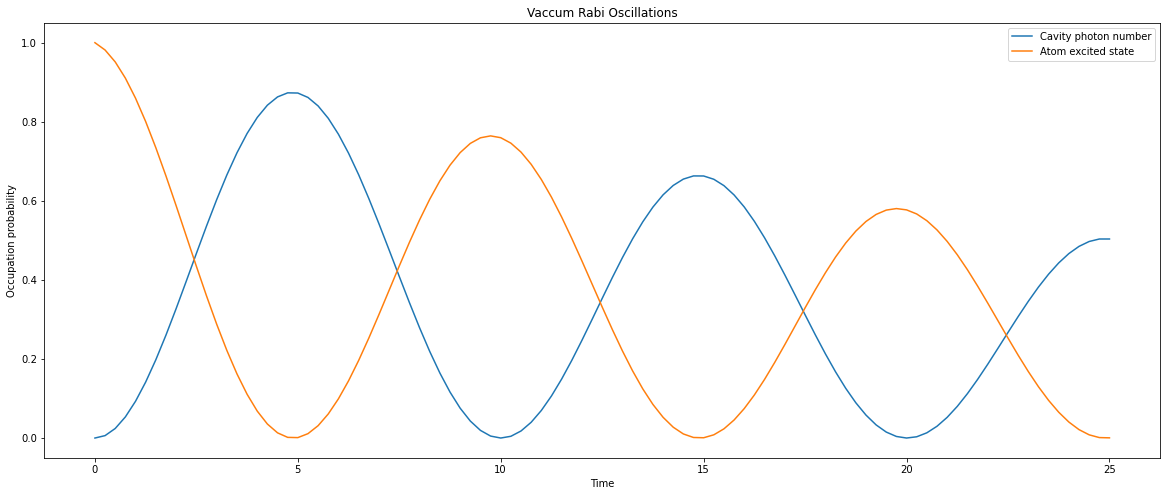

In [253]:
n_c = output.expect[0] # 腔的光子数
n_a = output.expect[1] # 原子的能级占据态

# 绘图
fig, axes = plt.subplots(1, 1, figsize = (20, 8))
axes.plot(tlist, n_c, label = 'Cavity photon number')
axes.plot(tlist, n_a, label = 'Atom excited state')
axes.legend(loc = 1)
axes.set_xlabel('Time')
axes.set_ylabel('Occupation probability')
axes.set_title('Vaccum Rabi Oscillations')

## Wigner function

#### 需要注意，在指定求解期望值时，本征态的的求解结果便不会给出

In [254]:
# 重新获取演化结果（每一时刻的状态）
output = mesolve(H, psi0, tlist, c_ops, [])

In [255]:
output

Result object with mesolve data.
--------------------------------
states = True
num_collapse = 2

In [256]:
output.states[-1]

Quantum object: dims = [[15, 2], [15, 2]], shape = (30, 30), type = oper, isherm = True
Qobj data =
[[4.96058553e-01+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j        ]
 [0.00000000e+00+0.j         4.81112490e-04+0.j
  0.00000000e+00-0.01549669j 0.00000000e+00+0.j
  0.00000000e+00+0.j         0.00000000e+00+0.j
  0.00000000e+00+0.j       

In [257]:
t_idx = np.where([tlist == t for t in [0.0, 5.0, 15.0, 25.0]])[1]
t_idx

array([  0,  20,  60, 100], dtype=int64)

In [258]:
tlist[t_idx]

array([ 0.,  5., 15., 25.])

In [259]:
# 获取这些时刻的密度矩阵
rholist = [output.states[i] for i in t_idx]

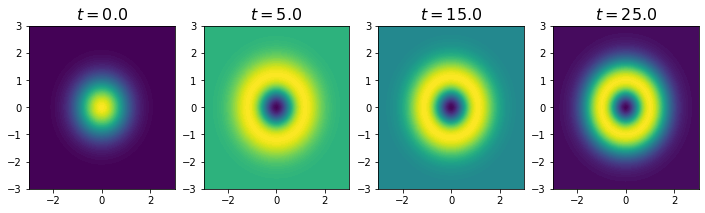

In [260]:
# 遍历密度矩阵

xvec = np.linspace(-3, 3, 200)

fig, axes = plt.subplots(1, len(rholist), sharex=True, figsize=(3 * len(rholist), 3))

for idx, rho in enumerate(rholist):
    # 求 trace
    rho_c = ptrace(rho, 0)

    # 计算 Wigner 函数
    W = wigner(rho_c, xvec, xvec)

    # 画出 Wigner 函数
    axes[idx].contourf(xvec, xvec, W, 100)

    axes[idx].set_title('$t = %.1f$' % tlist[t_idx][idx], fontsize = 16)

Text(0, 0.5, 'Occupation probability')

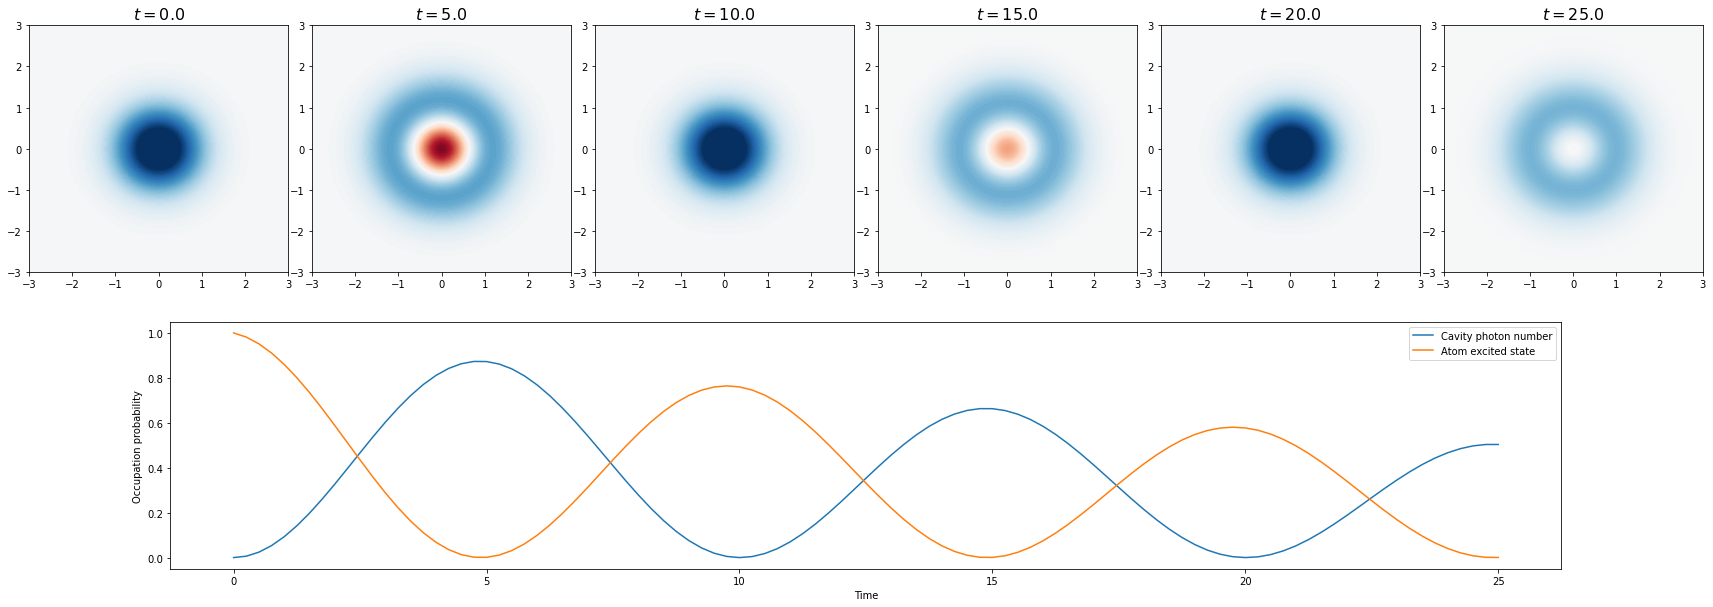

In [261]:
t_idx = np.where([tlist == t for t in [0,5,10,15,20,25]])[1]
rholist = [output.states[i] for i in t_idx]

fig_grid = (2, len(rholist) * 2)
fig = plt.figure(figsize=(5 * len(rholist), 10))

for idx, rho in enumerate(rholist):
    rho_c = ptrace(rho, 0)

    W = wigner(rho_c, xvec, xvec)

    ax = plt.subplot2grid(fig_grid, (0, 2*idx), colspan=2)
    ax.contourf(xvec, xvec, W, 100, norm=matplotlib.colors.Normalize(-.25,.25), cmap=plt.get_cmap('RdBu'))
    ax.set_title('$t = %.1f$' % tlist[t_idx][idx], fontsize=16)

ax = plt.subplot2grid(fig_grid, (1,1), colspan=(fig_grid[1]-2))
ax.plot(tlist, n_c, label='Cavity photon number')
ax.plot(tlist, n_a, label='Atom excited state')
ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('Occupation probability')